<a href="https://colab.research.google.com/github/ganochan/statistical_analysis_with_python_Lern/blob/main/ch2_scores_em.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 一次元データの整理
データの特徴をつかむ方法
+ 数値の指標によってデータを要約する：平均や分散
+ 視覚的にデータを俯瞰する：図示

In [1]:
#セッションの準備
import numpy as np
import pandas as pd

#Jupyter Notebookの出力を小数点以下3桁に抑える
%precision 3

#Dataframeの出力を小数点以下3桁に抑える
pd.set_option('precision', 3)

In [2]:
#サンプルデータのインポート
df = pd.read_csv('drive/MyDrive/python_stat_sample-data/ch2_scores_em.csv', index_col='生徒番号')

#dfの最初の5行を表示
df.head()

,英語,数学
生徒番号,,
1,42,65
2,69,80
3,56,63
4,41,63
5,57,76


# NumpyとPandasでデータを使えるようにする

生徒番号順で10人の英語の点数を使う。このデータをNumpyで計算するために、arrayというデータ構造にしてscoresという名前で保存する。

- array は数値計算に強い高機能な多次元配列

In [3]:
scores = np.array(df['英語'])[:10]
scores

array([42, 69, 56, 41, 57, 48, 65, 49, 65, 58])

Numpyと同じように、PandasのDataFrameを作る。DataFrameには10人の生徒それぞれに、Aさん、Bさん・・・と名前をつけておく。

In [4]:
scores_df = pd.DataFrame({'点数':scores},index = pd.Index(['A','B','C','D','E','F','G','H','I','J'],name = '生徒'))
scores_df

,点数
生徒,
A,42
B,69
C,56
D,41
E,57
F,48
G,65
H,49
I,65


## データの中心の指標
データの中心を表す指標（データを一つの値で要約するならばこれ）＝代表値
# 平均値
平均値（mean）

In [ ]:
#定義に基づき、Pythonで実直に書く
sum(scores) / len(scores)

55.000

In [ ]:
#NumPyの関数（mean）を使う
np.mean(scores)

55.000

In [ ]:
#Dataframeのmeanメソッドを使って平均を求める
scores_df.mean()

点数    55.0
dtype: float64

# 中央値
中央値（median）：データの大きさの順に並べたときにちょうど中央に位置する値

中央値は平均値に比べて外れ値に強い。

データの数が偶数の場合は中央値はそれら二つの値の平均値と定義される。

中央値の定義


*   データ数nが奇数なら、（n+1)/2番目のデータが中央値
*   データ数nが偶数なら、n/2番目のデータとn/2+1番目のデータの平均が中央値



In [ ]:
#scores内の点数を大きさの順番に並べる
sorted_scores = np.sort(scores)
sorted_scores

array([41, 42, 48, 49, 56, 57, 58, 65, 65, 69])

In [ ]:
#中央値の定義をPythonのコードに落とす。リストのインデックスは0はじまりであるため、定義とは１ずれることに注意
n = len(sorted_scores)
if n % 2 == 0: #偶奇を判定（偶数ならifの中へ）
    m0 = sorted_scores[n//2 - 1] #中央値の前の値
    m1 = sorted_scores[n//2] #中央値の後の値
    median = (m0 + m1) / 2
else:
    median = sorted_scores[(n + 1)// - 1]
median

56.500

In [ ]:
#Numpyのmedian関数を使って中央値を計算(sortが含まれる)
np.median(scores)

56.500

In [ ]:
#DataframeやSeriesの場合、medianメソッドが利用可能
scores_df.median()

点数    56.5
dtype: float64

# 最頻値
最頻値（mode）:データ内で最も多く出現する値

DataFrameやSeriesのmodeメソッドを利用する

最頻値は質的データの代表値を求めるときに使う指標。テストの点数のような量的データについて最頻値を求めようとしても、まったく同じ点数が出ている頻度が少なく、一意に定まらないことが多い。

In [ ]:
#PandasのSeriesの中に含まれる6個の要素のmodeをとる。
pd.Series([1,1,1,2,2,3,]).mode()

0    1
dtype: int64

In [ ]:
#最頻値が一意に定まらない例（要素が全部表示されてしまう）
pd.Series([1,2,3,4,5]).mode()

0    1
1    2
2    3
3    4
4    5
dtype: int64

## データのばらつきの指標
平均値や中央値によって、データを代表する値は得られる。しかしクラス全員が50点のテストとクラスの半分が0点、残りが100点のテストでも平均点と中央値は50点となる。データのばらつきを数値で表現する方法を理解する

# 分散と標準偏差
偏差（deviation）：各データが平均からどれだけ離れているか

In [ ]:
#NumPyのブロードキャストという機能を用いて、各生徒の偏差を求める
mean = np.mean(scores) # scoresの平均値を求める
deviation = scores - mean # scores内の値がそれぞれ平均とどれだけ離れているかを求める
deviation

array([-13.,  14.,   1., -14.,   2.,  -7.,  10.,  -6.,  10.,   3.])

In [ ]:
#10人が受けた別のテストの偏差も求める
another_scores = [50, 60, 58, 54, 51, 56, 57, 53, 52, 59]
another_mean = np.mean(another_scores)
another_deviation = another_scores - another_mean
another_deviation

array([-5.,  5.,  3., -1., -4.,  1.,  2., -2., -3.,  4.])

scoreとanother_scoreではscoreのほうが、点数のばらつきが大きいように見える。

偏差を代表値として一つの値にまとめることはできない。（偏差の平均は常に０になる）

In [ ]:
#deviation（scoresの偏差）の平均を表示する
np.mean(deviation)

0.000

In [ ]:
#another_deviation(another_scoresの偏差）の平均を表示する
np.mean(another_deviation)

In [ ]:
#DataFrameを使ってまとめると
summary_df = scores_df.copy()
summary_df['偏差'] = deviation
summary_df

,点数,偏差
生徒,,
A,42,-13.0
B,69,14.0
C,56,1.0
D,41,-14.0
E,57,2.0
F,48,-7.0
G,65,10.0
H,49,-6.0
I,65,10.0


In [ ]:
summary_df.mean()

点数    55.0
偏差     0.0
dtype: float64

分散（variance）：偏差の二乗の平均

In [ ]:
#分散の定義をPythonで落とす
np.mean(deviation ** 2) #deviation（偏差）の二乗（** 2）の平均（.mean）を求める

86.000

In [ ]:
#NumPyで分散を求める
np.var(scores)

86.000

DataFrameやSeriesにもvarメソッドが存在するが、NumPyで求めたものとは異なる。
Pandasで計算される分散は違う値となってしまうことに注意。



*   標本分散：Numpyのデフォルト（本書の分散ではこちらを利用）
*   不偏分散：Pandasのデフォルト（推測統計において重要な役割を持つ指標）



In [ ]:
scores_df.var()

点数    95.556
dtype: float64

In [ ]:
#summry_dfに偏差二乗の列を追加しておく
summary_df[('偏差二乗')] = np.square(deviation)
summary_df

,点数,偏差,偏差二乗
生徒,,,
A,42,-13.0,169.0
B,69,14.0,196.0
C,56,1.0,1.0
D,41,-14.0,196.0
E,57,2.0,4.0
F,48,-7.0,49.0
G,65,10.0,100.0
H,49,-6.0,36.0
I,65,10.0,100.0


In [ ]:
summary_df.mean()
#偏差二乗の列の平均をとると分散の値になる

点数      55.0
偏差       0.0
偏差二乗    86.0
dtype: float64

標準偏差：分散のルートをとった値

In [ ]:
#分散のルートをとる
np.sqrt(np.var(scores, ddof=0))

9.274

# 範囲と四分位範囲
範囲（range）:データの最大値と最小値だけでばらつきを表現する

最大値と最小値の差が大きければ、ばらつきが大きく、小さければばらつきも小さいという考え方。大雑把な指標で外れ値に弱い。

In [ ]:
#数式とPythonを使った実装
np.max(scores) - np.min(scores)

28

四分位範囲（interquartile range）：データの下位25%（Q1:第1四分位）、50%（Q2:第2四分位）,75%（Q3:第3四分位）に位置する値に注目する。そして四分位範囲（IQR=Q3-Q1）として定義する。

In [ ]:
# scoresのIQRを求める。データの25%点などはNumPyのpercentileという関数で求める
scores_Q1 = np.percentile(scores, 25)
scores_Q3 = np.percentile(scores, 75)
scores_IQR = scores_Q3 - scores_Q1
scores_IQR

15.000

IQRを求める際に使わなかったQ2は中央値に一致する。IQRは中央値に対して定義されるばらつきの指標と解釈する。

Q1,Q2,Q3,IQRは箱ひげ図という図示方法でも使う。

In [ ]:
#describe関数を使って、DatafremeやSeriesの様々なデータ指標を一度に求める
pd.Series(scores).describe()

count    10.000
mean     55.000
std       9.775
min      41.000
25%      48.250
50%      56.500
75%      63.250
max      69.000
dtype: float64

# データの正規化
正規化（normalization）：データを統一的な指標に変換すること


## 標準化
標準化（standardization）：データから平均を引き、標準偏差で割る操作

標準化されたデータ：基準化変量（standardized data）／Zスコア（z-score）

In [5]:
#テストの点数を標準化する
z = (scores - np.mean(scores)) / np.std(scores)
z

array([-1.402,  1.51 ,  0.108, -1.51 ,  0.216, -0.755,  1.078, -0.647,
        1.078,  0.323])

In [6]:
#標準化されたデータは平均が0で標準偏差が１になる
np.mean(z), np.std(z, ddof=0)

(-0.000, 1.000)

## 偏差値
偏差値：平均が50、標準偏差が10になるように正規化した値

In [8]:
#scoreのデータを使って各生徒の偏差値を計算する
z = 50 + 10 * (scores - np.mean(scores)) / np.std(scores)
z

array([35.982, 65.097, 51.078, 34.903, 52.157, 42.452, 60.783, 43.53 ,
       60.783, 53.235])

In [9]:
# DataFrameにまとめて、点数と偏差値の関係を見る
scores_df['偏差値'] = z
scores_df

,点数,偏差値
生徒,,
A,42,35.982
B,69,65.097
C,56,51.078
D,41,34.903
E,57,52.157
F,48,42.452
G,65,60.783
H,49,43.530
I,65,60.783


# 1次元データの視覚化
データを表や図にすることでデータの特徴や分布を視覚的につかんでいく方法

In [11]:
#50人分の英語の点数のarray
english_scores = np.array(df['英語'])
#Seriesに変換してdescribeを表示
pd.Series(english_scores).describe()

count    50.00
mean     58.38
std       9.80
min      37.00
25%      54.00
50%      57.50
75%      65.00
max      79.00
dtype: float64

##度数分布表
データがとる値をいくつかの区間に分けて、各区間にいくつのデータが分類されるかを数える。分割した区間とデータ数を表にまとめたものが度数分布表。

*   区間：階級（class）
*   階級に属しているデータの数：度数（frequency）
*   各区間の幅：階級幅
*   階級の数：階級数





In [14]:
# 度数分布表を作成
#度数はnp.histgram関数を利用：binsで階級数、rangeで最小値と最大値を指定
freq, _ = np.histogram(english_scores, bins = 10, range=(0,100))
freq

array([ 0,  0,  0,  2,  8, 16, 18,  6,  0,  0])

In [15]:
#DataFrameに結果をまとめる。
#0～10,10～20,・・・といった文字列のリストを作る
freq_class = [f'{i}~{i+10}' for i in range(0,100,10)]
#freq_classをインデックスにしてfreqでDataFrameを作る
freq_dist_df = pd.DataFrame({'度数':freq}, index = pd.Index(freq_class, name='度数'))
freq_dist_df

,度数
度数,
0~10,0
10~20,0
20~30,0
30~40,2
40~50,8
50~60,16
60~70,18
70~80,6
80~90,0


度数分布表は階級と度数以外にも階級値、相対度数、累積度数といった値が一緒に使われる。


*   階級値：各階級を代表する値。階級の中央値が使われる
*   相対度数：全データ数に対してその階級のデータが占める割合
*   累積相対度数：その階級までの相対度数の和



In [16]:
# 階級値の例
class_value = [(i+(i+10))//2 for i in range(0,100,10)]
class_value

[5, 15, 25, 35, 45, 55, 65, 75, 85, 95]

In [17]:
# 相対度数の例
rel_freq = freq / freq.sum()
rel_freq

array([0.  , 0.  , 0.  , 0.04, 0.16, 0.32, 0.36, 0.12, 0.  , 0.  ])

In [18]:
# 累積相対度数の例
cum_rel_freq = np.cumsum(rel_freq)
cum_rel_freq

array([0.  , 0.  , 0.  , 0.04, 0.2 , 0.52, 0.88, 1.  , 1.  , 1.  ])

In [19]:
# 度数分布表に階級値、相対度数、累積相対度数を付け加える
freq_dist_df['階級値'] = class_value
freq_dist_df['相対度数'] = rel_freq
freq_dist_df['累積相対度数'] = cum_rel_freq
freq_dist_df = freq_dist_df[['階級値','度数','相対度数','累積相対度数']]
freq_dist_df

,階級値,度数,相対度数,累積相対度数
度数,,,,
0~10,5,0,0.00,0.00
10~20,15,0,0.00,0.00
20~30,25,0,0.00,0.00
30~40,35,2,0.04,0.04
40~50,45,8,0.16,0.20
50~60,55,16,0.32,0.52
60~70,65,18,0.36,0.88
70~80,75,6,0.12,1.00
80~90,85,0,0.00,1.00


In [20]:
# 度数分布表から最頻値を求める
freq_dist_df.loc[freq_dist_df['度数'].idxmax(), '階級値']

65

## ヒストグラム
ヒストグラム（histogram）：度数分布表を棒グラフで表したもの。
Pythonでグラフを表示するときは標準ライブラリのMatplotlibを使用する。

統計解析の3種の神器：Pandas/NumPy/Matplotlib

In [21]:
# Matplotlibのpyplotモジュールをpltという名前でインポート
import matplotlib.pyplot as plt

#グラフがnotebook上に表示されるようにする
%matplotlib inline

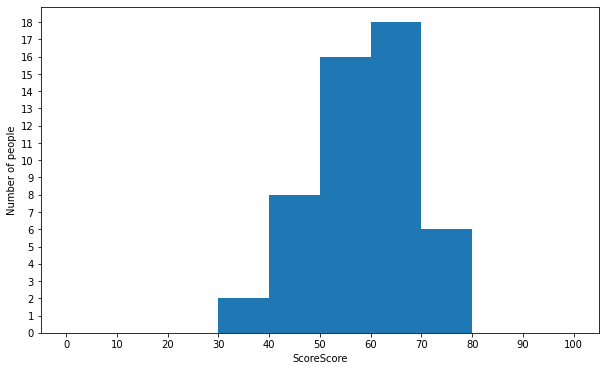

In [24]:
# キャンバスを作る
# figsizeで横・縦の大きさを指定
fig = plt.figure(figsize=(10,6))
# キャンバス上にグラフを描画するための領域を作る
# 引数は領域を1×1個作り、1つめの領域に描画することを意味する
ax = fig.add_subplot(111)

# 階級数を10にしてヒストグラムを描画
freq, _, _ = ax.hist(english_scores, bins=10, range=(0,100))
# X軸にラベルをつける
ax.set_xlabel('ScoreScore')
# Y軸にラベルをつける
ax.set_ylabel('Number of people')
# X軸に0,10,20・・・100のメモリをふる
ax.set_xticks(np.linspace(0,100, 10+1))
# Y軸に0,1,2・・・のメモリをふる
ax.set_yticks(np.arange(0,freq.max()+1))
# グラフの表示
plt.show()

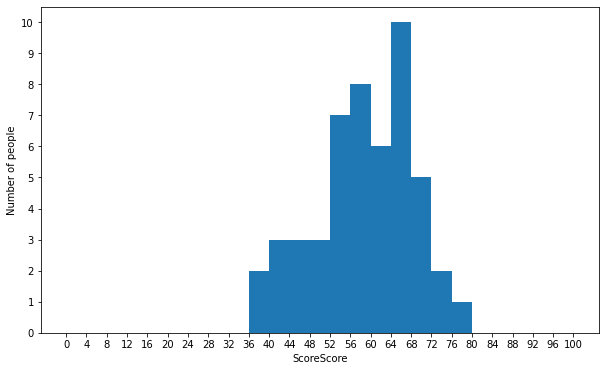

In [25]:
# 階級数を25（階級幅を4）に変更してヒストグラムを作成
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

# 階級数を25にしてヒストグラムを描画
freq, _, _ = ax.hist(english_scores, bins=25, range=(0,100))
ax.set_xlabel('Score')
ax.set_ylabel('Number of people')
ax.set_xticks(np.linspace(0,100, 25+1))
ax.set_yticks(np.arange(0,freq.max()+1))
plt.show()

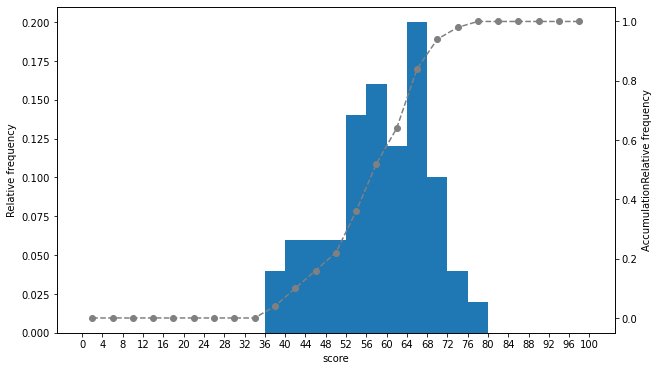

In [27]:
#相対度数のヒストグラムを累積相対度数の折れ線グラフと一緒に描画する

fig = plt.figure(figsize=(10,6))
ax1 = fig.add_subplot(111)
# Y軸のスケールが違うグラフをax1と同じ領域上に書けるようにする
ax2 = ax1.twinx()

# 相対度数のヒストグラムにするために、度数をデータの数で割る（histの引数weightを指定することで実現）
weights = np.ones_like(english_scores) / len(english_scores)
rel_freq, _, _ = ax1.hist(english_scores, bins=25, range=(0,100), weights=weights)
cum_rel_freq = np.cumsum(rel_freq)
class_value = [(i+(i+4))//2 for i in range(0,100,4)]
# 折れ線グラフの描画
# 引数lsを'--'にすることで線が点線に
# 引数markerを'o'にすることでデータ点を丸に
# 引数colorを'gray'にすることで灰色に
ax2.plot(class_value, cum_rel_freq, ls='--', marker='o', color='gray')
# 折れ線グラフの罫線を消去
ax2.grid(visible = False)

# 日本語フォントを入れてないので、
# 相対度数：Relative frequency、累積相対度数：AccumulationRelative frequency
ax1.set_xlabel('score')
ax1.set_ylabel('Relative frequency')
ax2.set_ylabel('AccumulationRelative frequency')
ax1.set_xticks(np.linspace(0,100,25+1))

plt.show()

## 箱ひげ図
箱ひげ図（box plot）：データのばらつきを表現するための図

４分位範囲のQ1,Q2,Q3,IQRを使う。

箱はQ1からQ3を表す。ひげはQ1-1.5IQRからQ3+IQRを表す。
そこに入らないデータは外れ値となる。

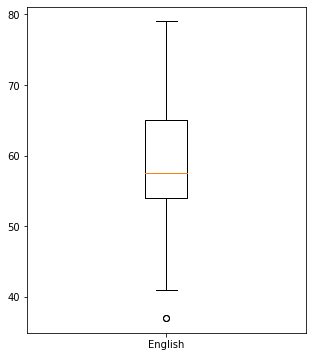

In [30]:
#箱ひげ図を用いる。boxplotメソッドを使って描画
fig = plt.figure(figsize=(5,6))
ax = fig.add_subplot(111)
ax.boxplot(english_scores, labels=['English'])

plt.show()